_Pablo Latorre and Hafid Laayouni_

You need to install the following Python packages: _pandas, numpy, scipy, statsmodels, matplotlib and pingouin._

You can do it in Linux, for instance, with [pip installer](https://pip.pypa.io/en/stable/installing/) by typing the following command in the terminal:

__sudo pip install pandas numpy statsmodels scipy matplotlib pingouin__

Then, you have to import in Python the following packages:

In [2]:
# loading required functions and modules #
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
import matplotlib.pyplot as plt
import pingouin as pg
import seaborn as sb

Besides, at the end of this document there is a **Functions' guide** section with practical information about some of the functions used in this session.

# Introduction to One-way Analysis of Variance

## Definition

The one-way analysis of variance (ANOVA) is used to compare several groups of a quantitative variable.
Specifically, it is a way to calculate if there are any statistically significant differences between the means of
three or more independent groups. It tests the following null hypothesis:
\begin{equation*}
H_0: \mu_1 = \mu_2 = \mu_3 = ... = \mu_a
\end{equation*}
Where $\mu =$ group mean and $a =$ number of groups.

In the case that the one-way ANOVA returns a significant result, the alternative hypothesis ($H_A$) is accepted,
meaning that at least two group means are statistically different. However, the ANOVA statistic will not tell
you which are the significantly different groups, for that we will need a post hoc test.

## Assumptions

In order to use the ANOVA test statistic, three main assumptions must be satisfied:

* The dependent variable is normally distributed in each group.

* There is homogeneity of variances, the population variances in each group are equal.

* Independence of observations.

## Example

Let’s work with the following simple example:


In [3]:
# dictionary with type of fertilizer as key and array of production as values
values = {'fertilizer1' : [6.27,5.36,6.39,4.85,5.99,7.14,5.08,4.07,4.35,4.95],
'fertilizer2' : [3.07,3.29,4.04,4.19,3.41,3.75,4.87,3.94,6.28,3.15],
'fertilizer3' : [4.04,3.79,4.56,4.55,4.55,4.53,3.53,3.71,7.00,4.61]}
# create panda dataframe
data = pd.DataFrame(values)
data

,fertilizer1,fertilizer2,fertilizer3
0,6.27,3.07,4.04
1,5.36,3.29,3.79
2,6.39,4.04,4.56
3,4.85,4.19,4.55
4,5.99,3.41,4.55
5,7.14,3.75,4.53
6,5.08,4.87,3.53
7,4.07,3.94,3.71
8,4.35,6.28,7.00
9,4.95,3.15,4.61


The data represents the production of pumpkins of plots that received treatments with different fertilizers.
The question we ask ourselves here is: does the fertilizer have an effect on the pumpkin production?
To answer this question, we could use one-way ANOVA.


# The ANOVA Python function
First, we need a special format of the data to work with Python, it is called long-format data. We will import it from the file *fertilizer_long_format.txt*

In [4]:
fd = pd.read_table("fertilizer_long_format.txt", sep=' ') #fd vol dir fertilizer data
fd.head()

,fertilizer,production
0,fertilizer1,6.27
1,fertilizer1,5.36
2,fertilizer1,6.39
3,fertilizer1,4.85
4,fertilizer1,5.99


In [4]:
fd.groupby('fertilizer').agg('mean').round(2)

,production
fertilizer,
fertilizer1,5.44
fertilizer2,4.00
fertilizer3,4.49


In [5]:
fd.groupby('fertilizer').agg('std').round(2)

,production
fertilizer,
fertilizer1,0.98
fertilizer2,0.97
fertilizer3,0.97


Before performing one-way ANOVA, let’s check normality and homogeneity of variance assumptions.


**HINT**: To check normality we can use the statistical test Kolmogorov-Smirnov (*stats.kstest()* function)
This Kolmogorov-Smirnov tests is used to compare certain data with a certain distribution. It's a non parametric test

fertilizer1         AxesSubplot(0.1,0.559091;0.363636x0.340909)
fertilizer2    AxesSubplot(0.536364,0.559091;0.363636x0.340909)
fertilizer3             AxesSubplot(0.1,0.15;0.363636x0.340909)
dtype: object

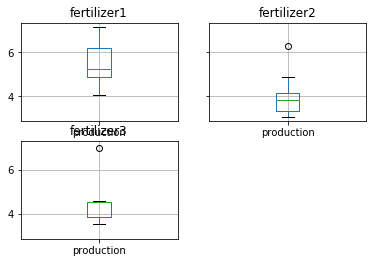

In [6]:
fd.groupby("fertilizer").boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017134EC45C8>,
      dtype=object)

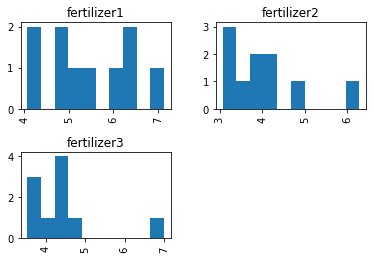

In [7]:
fd.production.hist(by=fd.fertilizer) #histogram by groups

In [8]:
stats.kstest(fd.production, 'norm')

KstestResult(statistic=0.9989297061453211, pvalue=1.5350444325246366e-89)

Això no sé pas què vol dir, espero comentar-ho a la pràctica. El que jo hagués fet seria un gràfic.
A més, fent-ho com a les solucions, la p dóna molt més gran, que correspon més a l'esperat ja que no sembla de cap manera una distribució normal (pels histogrames)

In [5]:
prod_mean = np.mean(fd['production'])
prod_sd = np.std(fd['production'], ddof = 1)
stats.kstest(fd['production'], 'norm', args = (prod_mean, prod_sd))

KstestResult(statistic=0.1453124706703378, pvalue=0.5130077002793969)

H0: distribution normal
H1: distribution not normal
p is not small enough: accept H0

This test is for goodness of fit: does the data fit the normal distribution? It's not about means, not about std, just to see if the data fits a certain distribution.

What does the test do? 
Takes data and makes intervals and calculates %. Makes a comulative distribution (adding %), then we do the comulative for our expected distribution and calculates the differences (expected-what we have). This will give us the statistic. 

For a normal distribution, we know the percentages each interval is having. What we do is building intervals with our data, see the percentages and then compare how different they are from the theoretical normal, build statistic from that.


**HINT:** To test for homogeneity of variance, we can use Levene test. You could use *stats.levene()* function.

In [6]:
# Note that for this test we are using data instead of fertilizer_data
# we do so for convenience with function input
stats.levene(data['fertilizer1'], data['fertilizer2'], data['fertilizer3'])

LeveneResult(statistic=0.25557357081718185, pvalue=0.7763246395092929)

In [7]:
stats.levene(fd['production'][fd['fertilizer'] == 'fertilizer1'], 
                fd['production'][fd['fertilizer'] == 'fertilizer2'], 
                fd['production'][fd['fertilizer'] == 'fertilizer3'])

LeveneResult(statistic=0.25557357081718185, pvalue=0.7763246395092929)

Levene compares max and min variances and follows a chi distribution. Basically compares variances and says if they're the same

 I don't get what are these tests and what are the p-values representing. In this case, would we want p-values closer to one as we want to conclude variances are the same? Yes! We want to accept the null hypothesis.  Also, the data above doesn't look normal, and Levene tests are supposed to be used in normal distributions, isn't it? According to the ks test the distribution is normal, so we can use this test.
 
 We can use this assumption because the assumption is about the population, so the sample doesn't need to be completely normal in order to use this tests.

Now, let's perform one-way ANOVA. We can do it because: population follows a normal distribution, variances of groups are the same, random samples and not paired.


**HINT:** You can use the Python functions *ols()* and *anova_lm()*: WHAT THE HELL DOES OLS DO? what does linear regression have to do with that?

ols: we do a linear model. We want the production to be a function of the fertilizer. We use the data from our data and then we use it for the anova function.

mod stands for model, because we're modelling our data for it to fit production is a function of fertilizer. Then we perform anova table. 

In this case between=fertilizer (name of the variable)
Instead of within or error, it's called residual. 

We have 30 datapoints, three fertilizers. Therefore ddoftotal=29, ddofbetween=2, ddofwithin=27

Result express that variation due to change of fertilizer is 5 times greater than what we would get by chance.

In [8]:
mod = ols('production ~ fertilizer',
                data=fd).fit()

aov_table = sm.stats.anova_lm(mod)
fvalue = aov_table['F'][0] # store f-value for downstream analyzes

aov_table

,df,sum_sq,mean_sq,F,PR(>F)
fertilizer,2.0,10.822747,5.411373,5.702374,0.008594
Residual,27.0,25.622150,0.948969,NaN,NaN


In [ ]:
pg.mixed_anova? #sembla que serà útil per two way anova.

The output of *anova_lm* function is a table where you will find in the first column the degrees of freedom of
SS between (a-1) and SS within (an-a). In the second column: the SS between (first row) and
SS within (also called Residual). In the fourth column you will see the F-statistic and in the fifth the p-value.

# Post hoc test after a significant result

Once a significant result is obtained with the one-way ANOVA, we can only say that at least one population mean is different from at least one other population mean. Now, we will learn how to know which is the population mean that is different from the others.
For that we will use *pairwise t-tests* with Bonferroni p-adjustment. 


**HINT**: You could use *pg.pairwise_ttests()* function.

In [12]:
pg.pairwise_ttests?

In [13]:
pg.pairwise_ttests(data=fd, dv='production', between='fertilizer',
                    subject=None, parametric=True, marginal=True, alpha=.05,
                    tail='two-sided', padjust='bonferroni', effsize='hedges',
                    correction='auto', nan_policy='listwise',
                    return_desc=False, interaction=True, within_first=True)

,Contrast,A,B,Paired,Parametric,T,dof,Tail,p-unc,p-corr,p-adjust,BF10,hedges
0,fertilizer,fertilizer1,fertilizer2,False,True,3.320116,18.0,two-sided,0.003808,0.011425,bonferroni,10.622,1.422063
1,fertilizer,fertilizer1,fertilizer3,False,True,2.196297,18.0,two-sided,0.041413,0.124239,bonferroni,1.926,0.940712
2,fertilizer,fertilizer2,fertilizer3,False,True,-1.121212,18.0,two-sided,0.276934,0.830801,bonferroni,0.615,-0.480235


We have p-corrected: the comparison is part of a group of comparisons. We want the false positives to be 5% all together, not for each pair.
For that, instead of working with our original alpha, we work with alpha=original alpha/num of comparisons, as as we do more comparisons the probability of getting a false positive grows. 

In our case, we have three comparisons: p-uncorrected*3=p-corrected.
now the alpha is 0.05 for all data, not only for one single comparison.

What can we conclude after the pairwise t-test?

i would conclude than f1 is different from f2 and f3 but 2 and 3 are not significantly different.

# Exercise 1. Randomization test

If the assumptions of ANOVA were not applicable, it would be a good solution to perform a randomization test for the anova, as we already did for t-student.



In [12]:
fd.groupby('fertilizer').describe()

production                                                    
                 count   mean       std   min     25%    50%     75%   max
fertilizer                                                                
fertilizer1       10.0  5.445  0.975981  4.07  4.8750  5.220  6.2000  7.14
fertilizer2       10.0  3.999  0.971750  3.07  3.3200  3.845  4.1525  6.28
fertilizer3       10.0  4.487  0.974714  3.53  3.8525  4.540  4.5575  7.00

In [13]:
f1=fd[fd.fertilizer == 'fertilizer1']
f2=fd[fd.fertilizer == 'fertilizer2']
f3=fd[fd.fertilizer == 'fertilizer3']

In [14]:
t12=tvalue=stats.ttest_ind(f1.production, f2.production)[0]
t23=tvalue=stats.ttest_ind(f2.production, f3.production)[0]
t13=tvalue=stats.ttest_ind(f1.production, f3.production)[0]

In [15]:
def doSamplingTlog(dat, numSamples, sizeSamples):
    for i in range(numSamples):
        g1 = np.random.choice(fd.production, size = 20)
        g2 = [j for j in fd.production if j not in g1]
        tval = stats.ttest_ind(g1,g2)[0]
        yield(tval)
z=doSamplingTlog(fd.product,10000,20)
ttest=np.fromiter(z,float)


In [16]:

signif = ttest[ttest >= t12]
(len(signif) / 10000) *2

0.0044

In [17]:

signif = ttest[ttest >= t13]
(len(signif) / 10000) *2

0.05

In [18]:

signif = ttest[ttest >= t23]
(len(signif) / 10000) *2

1.6258

Check solutions to get another way of doing it.

It gives the same results: 1 is different from others, but 2 and 3 are not significantly different from each other.

Another solution would be to transform the dependent variable to rank and run the anova as usual, this will be equivalent to a non parametric test.


**HINT**: You can use rank() function to rank a variable

In [20]:
rank=fd.rank()

In [21]:
modr = ols('production ~ fertilizer',
                data=rank).fit()

aov_table = sm.stats.anova_lm(modr)
fvalue = aov_table['F'][0] # store f-value for downstream analyzes

aov_table

,df,sum_sq,mean_sq,F,PR(>F)
fertilizer,1.0,324.0125,324.012500,4.719068,0.038451
Residual,28.0,1922.4875,68.660268,NaN,NaN


different than the solutions.

# Exercise 2. To be delivered

Medley and Clements (1998) investigated the impact of zinc contamination (and other heavy metals) on the
diversity of diatom species in the USA Rocky Mountains. The diversity of diatoms (number of species) and
degree of zinc contamination (categorized as either of high, medium, low or natural background level) were
recorded from between four and six sampling stations within each of six streams known to be polluted. These
data were used to test the null hypothesis that there were no differences the diversity of diatoms between
different zinc levels. You can find the data in the contamination.txt file.
Assess normality/homogeneity of variance using a boxplot of species diversity against zinc group. Test the $H_0$
that the population group means are all equal and perform the analysis of variance of species diversity versus
zinc-level groups. What is your conclusion?
Perform post-hoc test to investigate pairwise mean differences between all groups.

In [23]:
zinc=pd.read_table('contamination.txt', sep=' ')
zinc.head()

,STREAM,ZINC,DIVERSITY
0,Eagle,BACK,2.27
1,Eagle,HIGH,1.25
2,Eagle,HIGH,1.15
3,Eagle,MED,1.62
4,Blue,BACK,1.70


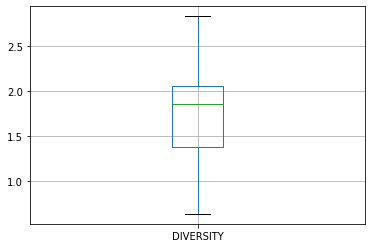

In [65]:
zinc.boxplot()

BACK         AxesSubplot(0.1,0.559091;0.363636x0.340909)
HIGH    AxesSubplot(0.536364,0.559091;0.363636x0.340909)
LOW              AxesSubplot(0.1,0.15;0.363636x0.340909)
MED         AxesSubplot(0.536364,0.15;0.363636x0.340909)
dtype: object

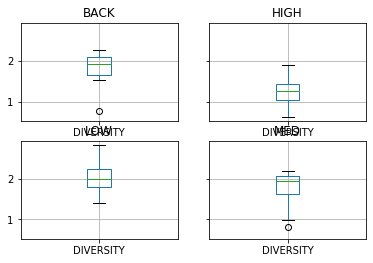

In [55]:
zinc.groupby('ZINC').boxplot()

Text(0.5, 0.98, ' ')

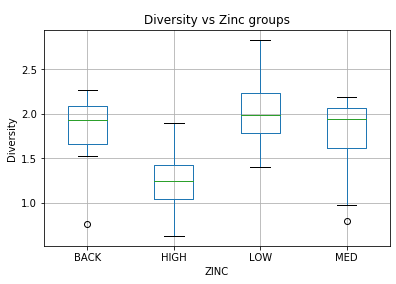

In [61]:
zinc.boxplot(column = 'DIVERSITY', by='ZINC')
plt.title('Diversity vs Zinc groups')
plt.ylabel('Diversity')
plt.suptitle(' ') #Elimina el títol generat automàticament

In [63]:
#let's see if it follows a normal distribution
total_mean = np.mean(zinc['DIVERSITY'])
total_sd = np.std(zinc['DIVERSITY'], ddof = 1)
stats.kstest(zinc['DIVERSITY'], 'norm', args = (total_mean, total_sd))

KstestResult(statistic=0.1384456434977126, pvalue=0.4967067018023658)

Aquí volem comprovar si la distribució és normal. 
H0: distribution is normal
Ha: distribution is not normal
As p>0.05 we can't reject H0 and we can say the distribution follows a normal distribution.

Seguidament comprovem si les variances són iguals.

In [77]:
g1=zinc['DIVERSITY'][zinc['ZINC']=='BACK']
g2=zinc['DIVERSITY'][zinc['ZINC']=='HIGH']
g3=zinc['DIVERSITY'][zinc['ZINC']=='LOW']
g4=zinc['DIVERSITY'][zinc['ZINC']=='MED']


In [78]:
stats.levene(g1,g2,g3,g4)

LeveneResult(statistic=0.01951130647607844, pvalue=0.9962139657365892)

Pvalue is very high: variations are the same


In [80]:
modr = ols('DIVERSITY ~ ZINC',
                data=zinc).fit()

aov_table = sm.stats.anova_lm(modr)
fvalue = aov_table['F'][0] # store f-value for downstream analyzes

aov_table

,df,sum_sq,mean_sq,F,PR(>F)
ZINC,3.0,2.566612,0.855537,3.93869,0.01756
Residual,30.0,6.516411,0.217214,NaN,NaN


P is very low (<0.05) therefore one of the groups are different. Let's do a pairwise t-test

In [83]:
pairedt=pg.pairwise_ttests(data = zinc, dv = 'DIVERSITY', 
                   between = 'ZINC', padjust = 'bonf')
pairedt

,Contrast,A,B,Paired,Parametric,T,dof,Tail,p-unc,p-corr,p-adjust,BF10,hedges
0,ZINC,BACK,HIGH,False,True,2.331709,14.103180,two-sided,0.035046,0.210277,bonf,2.235,1.084039
1,ZINC,BACK,MED,False,True,0.332326,14.879925,two-sided,0.744279,1.000000,bonf,0.436,0.152925
2,ZINC,BACK,LOW,False,True,-1.009528,14.000000,two-sided,0.329852,1.000000,bonf,0.601,-0.477231
3,ZINC,HIGH,MED,False,True,-2.000830,16.000000,two-sided,0.062674,0.376046,bonf,1.493,-0.898286
4,ZINC,HIGH,LOW,False,True,-3.557823,14.592185,two-sided,0.002974,0.017844,bonf,13.084,-1.645172
5,ZINC,MED,LOW,False,True,-1.368798,14.999855,two-sided,0.191213,1.000000,bonf,0.78,-0.626487


With alpha = 0.05
The pairs that are statistically different are

In [88]:
pairedt[pairedt['p-unc']<0.05]

,Contrast,A,B,Paired,Parametric,T,dof,Tail,p-unc,p-corr,p-adjust,BF10,hedges
0,ZINC,BACK,HIGH,False,True,2.331709,14.103180,two-sided,0.035046,0.210277,bonf,2.235,1.084039
4,ZINC,HIGH,LOW,False,True,-3.557823,14.592185,two-sided,0.002974,0.017844,bonf,13.084,-1.645172


Black - high and high-low are significantly different

<h1> Other stuff I tried

In [24]:
zinc.groupby('ZINC').describe()

DIVERSITY                                                       
         count      mean       std   min     25%    50%     75%   max
ZINC                                                                 
BACK       8.0  1.797500  0.485261  0.76  1.6575  1.935  2.0875  2.27
HIGH       9.0  1.277778  0.426872  0.63  1.0400  1.250  1.4300  1.90
LOW        8.0  2.032500  0.444996  1.40  1.7875  1.990  2.2300  2.83
MED        9.0  1.717778  0.503010  0.80  1.6200  1.940  2.0600  2.19

In [52]:
means= zinc.groupby('ZINC').agg('mean')
means.head()

,DIVERSITY
ZINC,
BACK,1.797500
HIGH,1.277778
LOW,2.032500
MED,1.717778


In [36]:
len(means)

4

In [43]:
x=means.loc(0)
print(x)

In [33]:
back=zinc[zinc.ZINC == 'BACK'].mean()
high=zinc[zinc.ZINC == 'HIGH'].mean()
low=zinc[zinc.ZINC == 'LOW'].mean()
med=zinc[zinc.ZINC == 'MED'].mean()
print(back, high, low, med)

DIVERSITY    1.7975
dtype: float64 DIVERSITY    1.277778
dtype: float64 DIVERSITY    2.0325
dtype: float64 DIVERSITY    1.717778
dtype: float64


In [72]:
x={}
for i in range(len(means)):
    x[i] = means.DIVERSITY[i]
        

In [73]:
x

{0: 1.7974999999999999,
 1: 1.2777777777777777,
 2: 2.0324999999999998,
 3: 1.7177777777777778}

In [74]:
x[1]

1.2777777777777777

# Functions' guide

Here you can find a brief help section for the most relevant functions and arguments used through the session. For detailled information about specific functions and extra functionalities remember that you can check the manual of a function by typing *help(your_function)* or just using Google. 

* **pd.read_table(data, sep = ' ')**

    Read general delimited file into DataFrame.

    sep = ' ' In this data frame we don't have the default tabulator separating the data columns. Instead, we have a whitespace, so we have to specify it to the the function via this argument.
    
* **stats.kstest(data, 'norm', args = (mean, sd))**

    Performs the one sample Kolmogorov-Smirnov test for goodness of fit.
    
    We specify we want to test our data against a normal distribution with 'norm' argument. In addition, we specify we want that normal distribution to have a given mean and standard deviation with args = ().
    
    
* **stats.levene(group1, group2, group3, ...)**

    Perform Levene test for equal variances.
    
    You just need to provide separately the data of the groups you are testing for.
    
    
* **ols('variable1 ~ variable2', data=data).fit()**

    Create a model from a formula and dataframe

    *variable1 ~ variable2* is the notation expected from the function.  It specifies that variable1 is the dependent variable and variable2 the independent variable. These variables should be present as columns of your data (long format data).
    
    *ols()* function creates the model and *fit()* is for fitting it.     
    

* **sm.stats.anova_lm(mod)**

    Anova table for one or more fitted linear models
    
    mod is the fitted model created with the *ols().fit()* functions
    

* **pg.pairwise_ttests(data, dv = continous_variable_name,** 
    **between = categorical_variable_name, padjust = 'bonf')**

    Pairwise T-tests.

    Tests for multiple comparisons. In this case, we are using pairwise t-test.
    
    dv specifies the continuos variable (pumpkin production in this case)
    
    between refers to to categorial variable (type of fertilizer in this case)
    
    padjust indicates the type of multiple testing correction we want to use. In this case we want bonferroni. Other options are, for example, 'holm' or 'fdr_bh'